In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

In [2]:
W = np.array([0.3, 1.2])
b = 0.7

def get_y_noise(X):
    noise = np.random.normal(loc=0, scale=1, size=1)[0]
    y = np.matmul(X, W) + b
    result = y + noise
    return result

def get_y(X):
    y = np.matmul(X, W) + b
    return y

In [3]:
X = np.random.random(size=(1000, 2))  * 10
X = X.reshape(-1, 2)
y = np.apply_along_axis(get_y, axis=1, arr=X)
y = y.reshape(-1, 1)

In [4]:
# X_test = np.random.random(size=(200, 2))  * 10
# y_test = np.apply_along_axis(get_y, axis=1, arr=X_test)

In [5]:
def create_figure(X, y):
    fig = plt.figure(figsize=(8, 8))

    # add axes
    ax = fig.add_subplot(111,projection='3d')
    
    # plot the plane    
    ax.scatter(X[:, 0], X[:, 1], y, marker="o")     
    ax.set_xlabel('X feature 1')
    ax.set_ylabel('X feature 2')
    ax.set_zlabel('Y')

    plt.show()

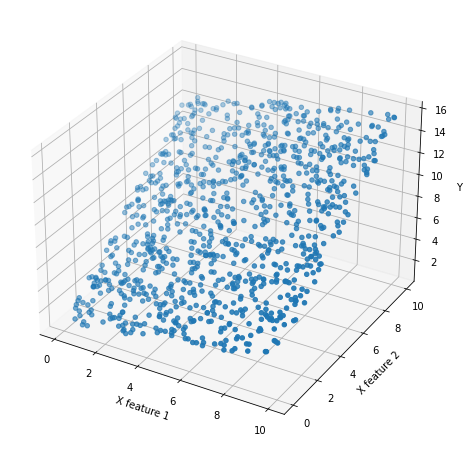

In [6]:
create_figure(X, y)

In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_fn = nn.Linear(2, 1)
    
    def forward(self, X):
        logits = self.linear_fn(X)
        return logits

In [8]:
model = LinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
loss_fn = torch.nn.MSELoss()

In [9]:
print(model)

LinearRegression(
  (linear_fn): Linear(in_features=2, out_features=1, bias=True)
)


In [10]:
def print_param(model):
    for name, param in model.named_parameters():
        print(f"name: {name}, param: {param}, gradients: {param.grad}")        

In [11]:
print_param(model)

name: linear_fn.weight, param: Parameter containing:
tensor([[0.5188, 0.4582]], requires_grad=True), gradients: None
name: linear_fn.bias, param: Parameter containing:
tensor([0.5344], requires_grad=True), gradients: None


In [12]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

epochs = 400
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()

    predicted_y = model(X)
    # loss = loss_fn(predicted_y, obs_y)
    loss = loss_fn(predicted_y, y)
    # print(f"Predicted {predicted_y}")
    # print(f"Truth_value {y}")
    if epoch % 50 == 0:
        print(f"Epoch:{epoch}, MSE: {loss}")   
        print_param(model)            

    # Don't want buffer to carry on
    loss.backward()    
    optimizer.step()


Epoch:50, MSE: 0.0016327108023688197
name: linear_fn.weight, param: Parameter containing:
tensor([[0.3093, 1.2086]], requires_grad=True), gradients: tensor([[0., 0.]])
name: linear_fn.bias, param: Parameter containing:
tensor([0.5951], requires_grad=True), gradients: tensor([0.])
Epoch:100, MSE: 0.0012770923785865307
name: linear_fn.weight, param: Parameter containing:
tensor([[0.3082, 1.2077]], requires_grad=True), gradients: tensor([[0., 0.]])
name: linear_fn.bias, param: Parameter containing:
tensor([0.6072], requires_grad=True), gradients: tensor([0.])
Epoch:150, MSE: 0.0010068637784570456
name: linear_fn.weight, param: Parameter containing:
tensor([[0.3073, 1.2068]], requires_grad=True), gradients: tensor([[0., 0.]])
name: linear_fn.bias, param: Parameter containing:
tensor([0.6177], requires_grad=True), gradients: tensor([0.])
Epoch:200, MSE: 0.000800262438133359
name: linear_fn.weight, param: Parameter containing:
tensor([[0.3065, 1.2060]], requires_grad=True), gradients: tensor

In [13]:
print_param(model)

name: linear_fn.weight, param: Parameter containing:
tensor([[0.3044, 1.2038]], requires_grad=True), gradients: tensor([[-0.0023, -0.0113]])
name: linear_fn.bias, param: Parameter containing:
tensor([0.6516], requires_grad=True), gradients: tensor([-0.0156])


In [14]:
W

array([0.3, 1.2])

In [15]:
b

0.7

In [16]:
y_pred = model(X).detach().numpy()

In [17]:
def create_compare_figure(X, y, y_pred):
    fig = plt.figure(figsize=(8, 8))

    # add axes
    ax = fig.add_subplot(111,projection='3d')
    
    # plot the plane    
    ax.scatter(X[:, 0], X[:, 1], y, marker="o", alpha=0.5, label="truth_y") 
    ax.scatter(X[:, 0], X[:, 1], y_pred, marker="o", color="red", alpha=0.5, label="predicted_y")     
    ax.set_xlabel('X feature 1')
    ax.set_ylabel('X feature 2')
    ax.set_zlabel('Y')
    ax.legend()

    plt.show()

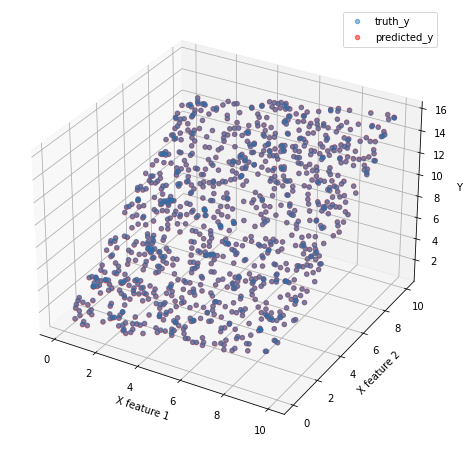

In [18]:
create_compare_figure(X, y, y_pred)